Load Liberaries to load, manipulate and visualise data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

The main thing to find is to analyse the data and predict the probability of a loan not being paid 
and to adjust the data name via using _ instead of . cause it cause problem while using pandas columns

In [2]:
data = pd.read_csv('loan_data.csv')
df = data.copy()
df.columns = [col.replace('.','_') for col in df.columns]
df

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


Lets create a dataframe that represent the value of null in a column and unique value and the unique value 

In [3]:
variable = pd.DataFrame(columns=['var','no. of unique','no. of null', 'val'])
for i, var in enumerate(df.columns):
    variable.loc[i] = [var, df[var].nunique(), df[var].isnull().sum(), df[var].unique().tolist()]
variable.set_index('var')

,no. of unique,no. of null,val
var,,,
credit_policy,2,0,"[1, 0]"
purpose,7,0,"[debt_consolidation, credit_card, all_other, h..."
int_rate,249,0,"[0.1189, 0.1071, 0.1357, 0.1008, 0.1426, 0.078..."
installment,4788,0,"[829.1, 228.22, 366.86, 162.34, 102.92, 125.13..."
log_annual_inc,1987,0,"[11.35040654, 11.08214255, 10.37349118, 11.299..."
dti,2529,0,"[19.48, 14.29, 11.63, 8.1, 14.97, 16.98, 4.0, ..."
fico,44,0,"[737, 707, 682, 712, 667, 727, 722, 677, 662, ..."
days_with_cr_line,2687,0,"[5639.958333, 2760.0, 4710.0, 2699.958333, 406..."
revol_bal,7869,0,"[28854, 33623, 3511, 33667, 4740, 50807, 3839,..."


In [4]:
numeric = ['int_rate', 'installment', 'log_annual_inc',
       'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec']
binary = ['credit_policy', 'not_fully_paid']
categorical = ['purpose']
loan = ['int_rate', 'installment','days_with_cr_line', 'revol_bal', 'revol_util']
person = ['log_annual_inc','dti', 'fico','inq_last_6mths', 'delinq_2yrs', 'pub_rec']
target = ['not_fully_paid']

In [5]:
df[binary].agg(['min','max'])

,credit_policy,not_fully_paid
min,0,0
max,1,1


In [6]:
df[numeric].agg(['min','max']).round(2)

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec
min,0.06,15.67,7.55,0.00,612,178.96,0,0.0,0,0,0
max,0.22,940.14,14.53,29.96,827,17639.96,1207359,119.0,33,13,5


Text(0.5, 1.0, 'Distribution of revolution balance')

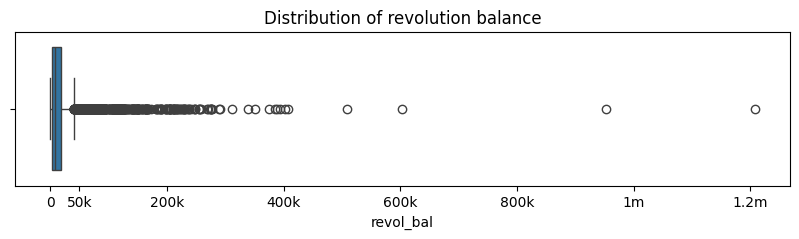

In [7]:
plt.figure(figsize=(10,2))
sns.boxplot(data=df, x='revol_bal')
plt.xticks(ticks=[0, 50000, 200000, 400000, 600000, 800000, 1000000, 1200000],labels= ['0', '50k', '200k', '400k', '600k', '800k', '1m', '1.2m'])
plt.title('Distribution of revolution balance')

Text(0.5, 1.0, 'Distribution of revolution balance')

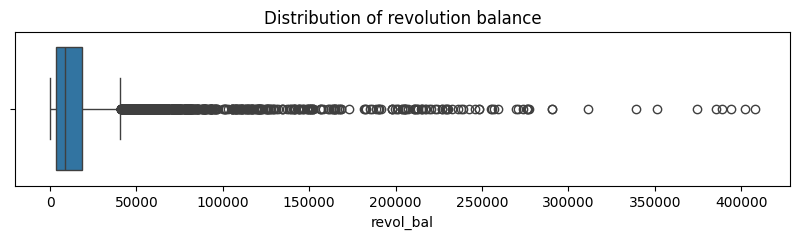

In [8]:
indices = df[df['revol_bal'] > 500000].index
df_clean = df.drop(indices)

plt.figure(figsize= (10,2))
sns.boxplot(data=df_clean, x='revol_bal')
plt.title('Distribution of revolution balance')

Text(0.5, 1.0, 'Count of loans by purpose')

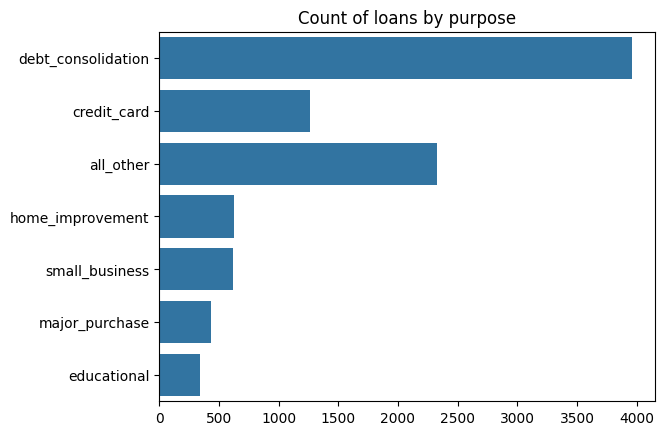

In [9]:
sns.countplot(y=df_clean.purpose)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Count of loans by purpose')

In [10]:
import matplotlib.ticker as mtick

Text(0.5, 0, '')

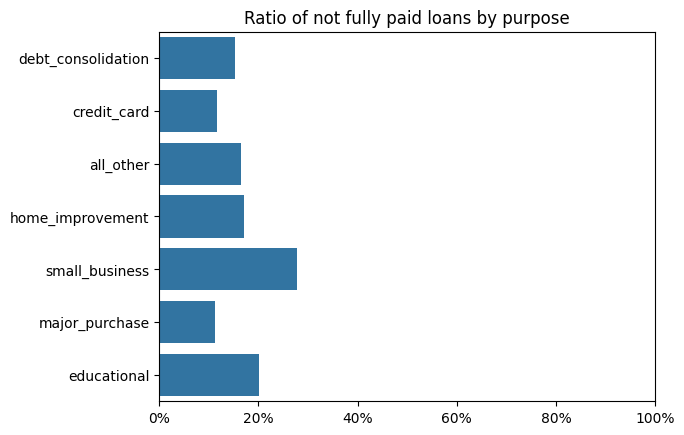

In [11]:
ax = sns.barplot(y=df_clean.purpose, x= df_clean.not_fully_paid.astype('int'), ci=None)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
plt.title('Ratio of not fully paid loans by purpose')
plt.xlim(0, 1)
plt.ylabel(None)
plt.xlabel(None)

(0.0, 1.0)

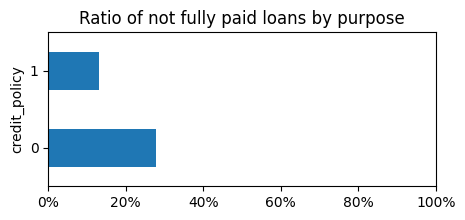

In [12]:
ratio = df_clean.groupby('credit_policy')['not_fully_paid'].mean()
ax= ratio.plot.barh(figsize=(5,2), title= 'Ratio of not fully paid loans by purpose')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))
plt.xlim(0, 1)

In [13]:
def show_distribution(feature= 'int_rate', name= 'Interest Rate'):
    fig, ax = plt.subplots(1, 3,figsize= (15, 4))
    sns.boxplot(data=df_clean, x=feature, y= 'purpose', ax = ax[0])
    ax[0].set_ylabel('')
    ax[0].set_xlabel(name)
    ax[0].set_title(name + ' by loan purpose')

    y = df_clean.not_fully_paid.astype('category')
    sns.boxplot(data= df_clean, x=feature, y=y, ax=ax[1])
    ax[1].set_ylabel('not fully paid')
    ax[1].set_xlabel(name)
    ax[1].set_title(name + ' by paid status')

    sns.histplot(x=df_clean[feature], cumulative= False, ax=ax[2])
    ax[2].set_ylabel('')
    ax[2].set_xlabel(name)
    ax[2].set_title(name + ' by Distribution')

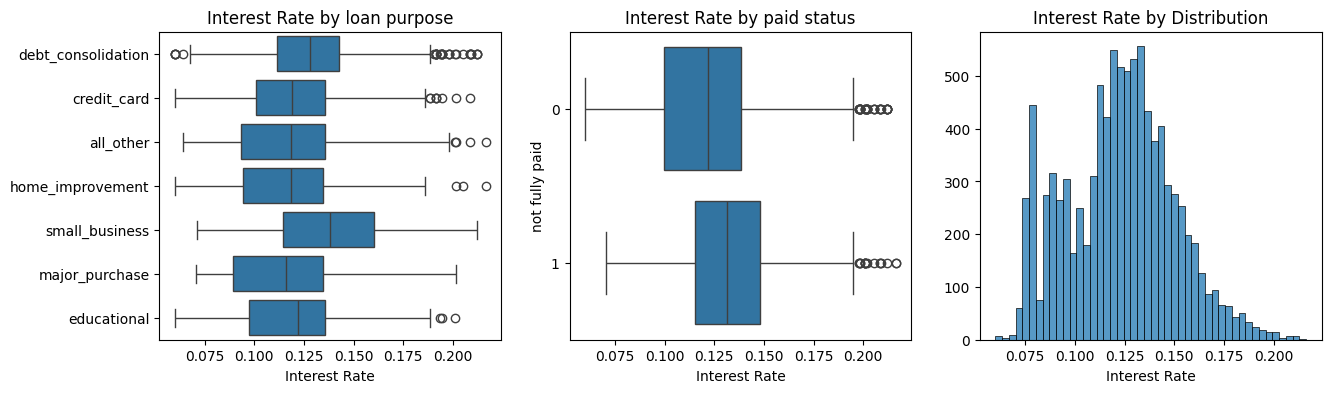

In [14]:
show_distribution('int_rate', 'Interest Rate')

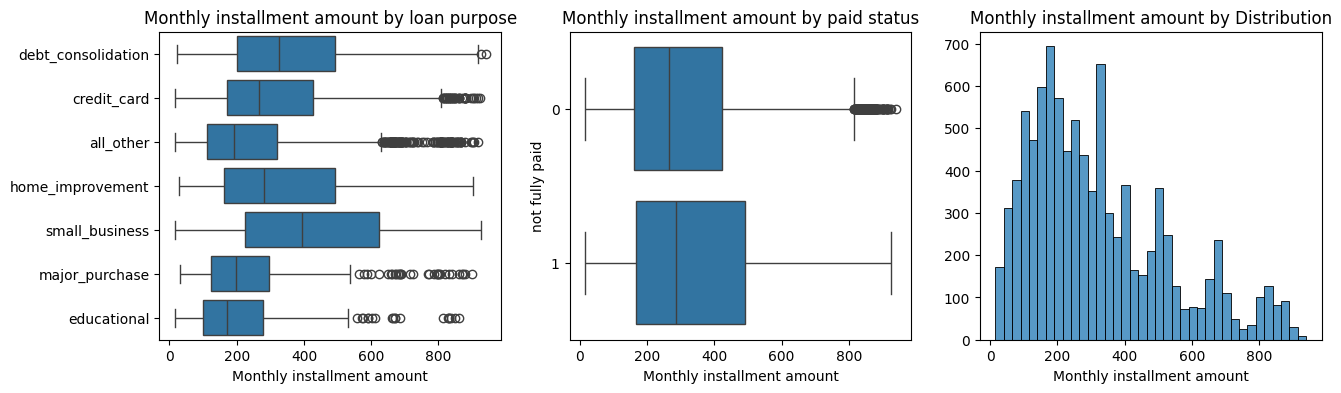

In [15]:
show_distribution('installment', 'Monthly installment amount')

In [16]:
df_clean.groupby(by=lambda x: df_clean.loc[x].purpose == 'small_business', sort=False)['installment'].describe().round().rename({0:'Others', 1: 'Small Business'})

,count,mean,std,min,25%,50%,75%,max
Others,8957.0,311.0,202.0,16.0,162.0,263.0,414.0,940.0
Small Business,617.0,433.0,248.0,16.0,225.0,393.0,624.0,927.0


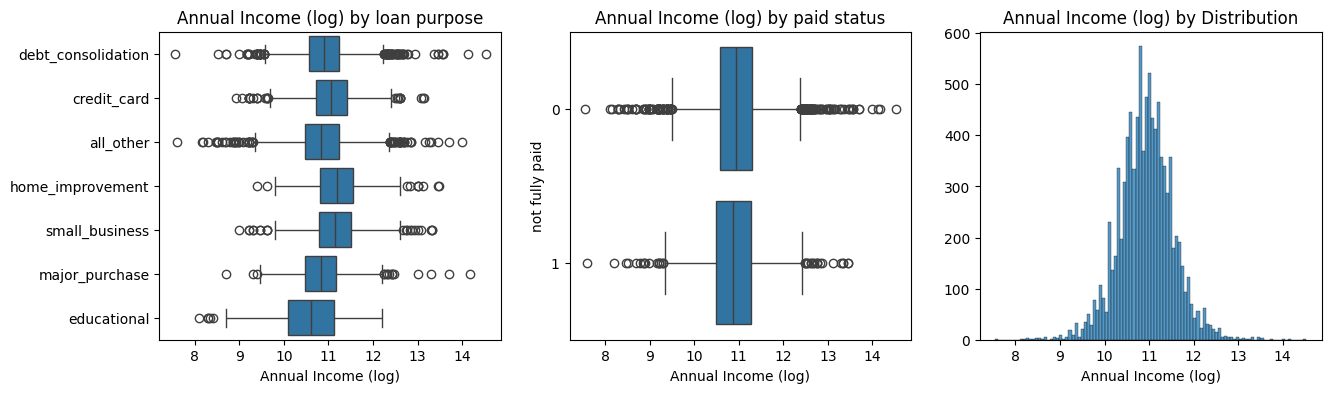

In [17]:
show_distribution('log_annual_inc', 'Annual Income (log)')

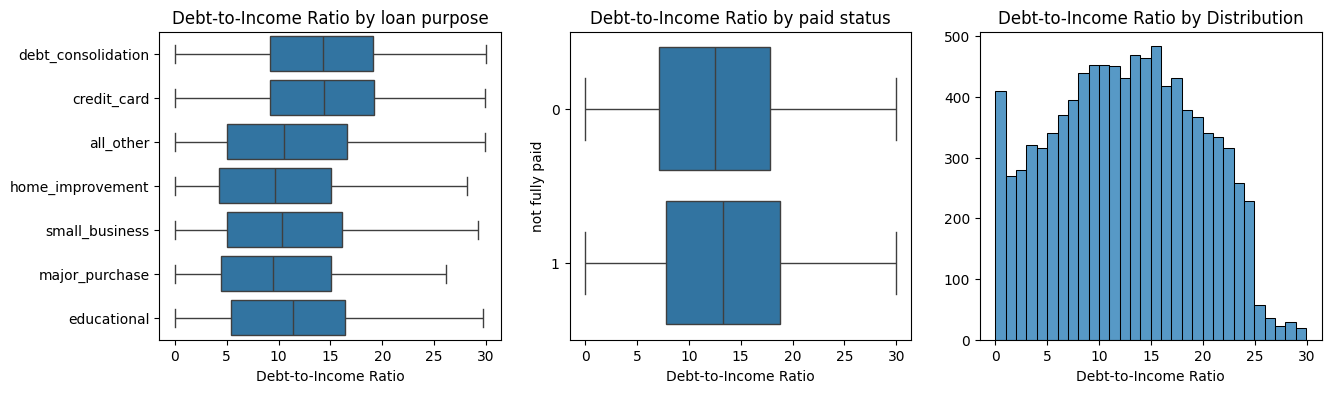

In [18]:
show_distribution('dti', 'Debt-to-Income Ratio')

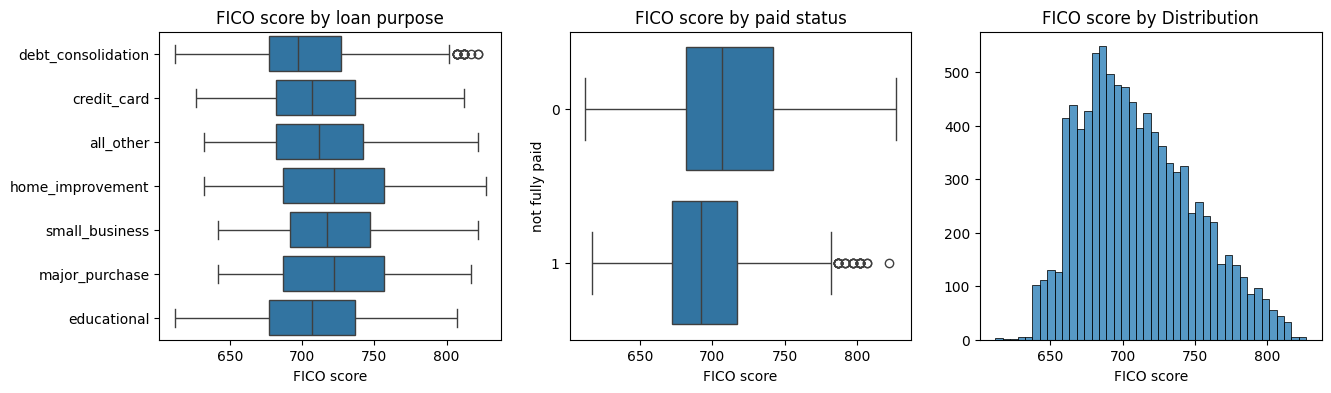

In [19]:
show_distribution('fico', 'FICO score')

In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [21]:
df_cluster = df_clean[['log_annual_inc', 'dti', 'fico']]
df_cluster = StandardScaler().fit_transform(df_cluster)
inertias = []
for k in range(1, 11):
    km = KMeans(k)
    km.fit(df_cluster)
    inertias.append(km.inertia_)

Text(0, 0.5, 'inertias')

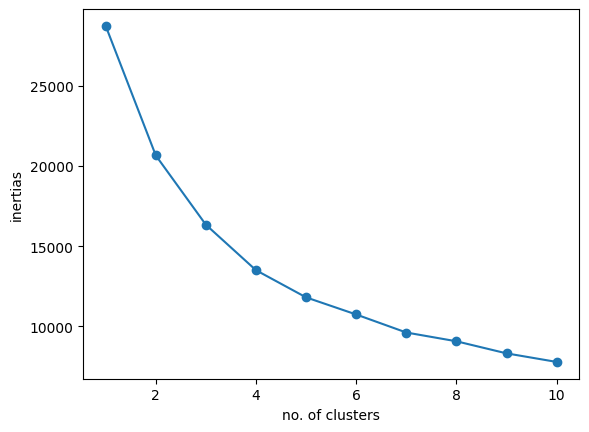

In [22]:
plt.plot(range(1, 11), inertias, marker= 'o')
plt.xlabel('no. of clusters')
plt.ylabel('inertias')

In [23]:
km = KMeans(3, random_state= 0)
km.fit(df_cluster)
df_clean['cluster'] = km.labels_
df_clean.groupby('cluster')[person].mean()

,log_annual_inc,dti,fico,inq_last_6mths,delinq_2yrs,pub_rec
cluster,,,,,,
0,10.967330,18.787368,696.073482,1.687392,0.177439,0.072745
1,10.529020,7.845734,689.829516,1.691326,0.244461,0.087871
2,11.256887,8.215792,751.713230,1.309641,0.068614,0.022519


Text(0.5, 1.0, 'No of loans by cluster and purpose')

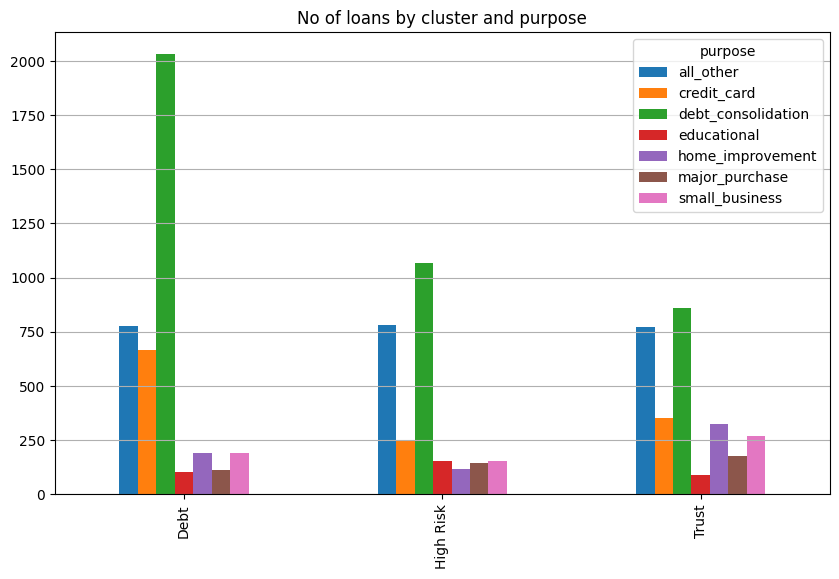

In [24]:
pd.crosstab(df_clean.cluster, df_clean.purpose).rename({0:'Debt', 1:'High Risk', 2:'Trust'}).plot.bar(figsize=(10,6))
plt.grid(axis= 'y')
plt.xlabel('')
plt.title('No of loans by cluster and purpose')

In [25]:
df_clean.groupby('cluster')['not_fully_paid'].mean().round(3)

cluster
0    0.177
1    0.193
2    0.105
Name: not_fully_paid, dtype: float64

Text(0.5, 1.0, 'Distribution of time with credit line')

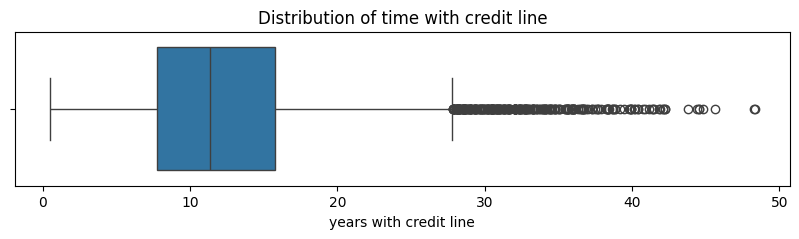

In [26]:
paid_back = df_clean.query('not_fully_paid == 0')
plt.figure(figsize=(10,2))
sns.boxplot(x=paid_back.days_with_cr_line/365)
plt.xlabel('years with credit line')
plt.title('Distribution of time with credit line')

Text(0.5, 1.0, 'Distribution of time with credit line by loan payment')

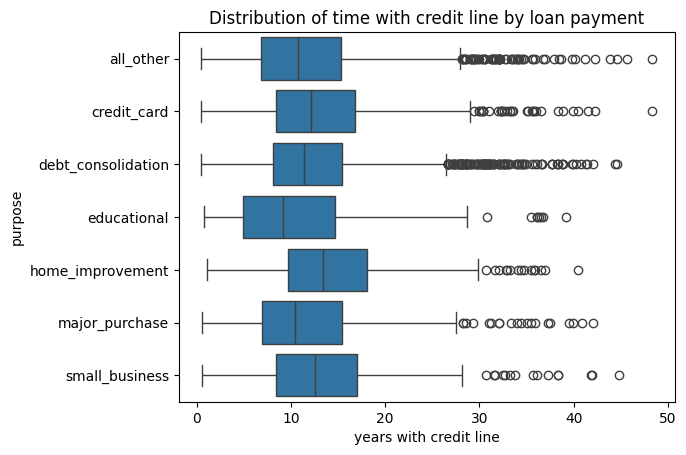

In [27]:
sns.boxplot(x= paid_back.days_with_cr_line/365, y=paid_back['purpose'].astype('category'))
plt.xlabel('years with credit line')
plt.title('Distribution of time with credit line by loan payment')

Text(0.5, 1.0, 'Distribution of time with credit line by cluster')

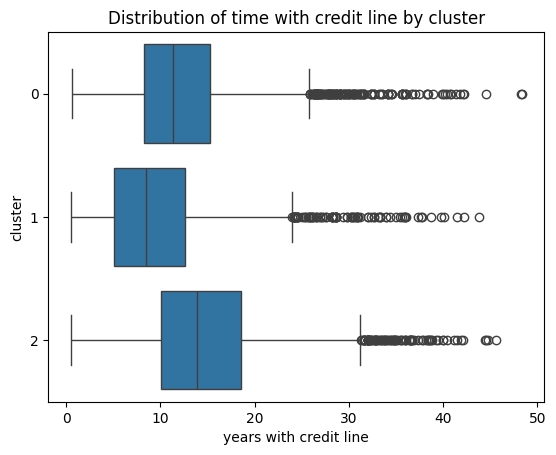

In [28]:
sns.boxplot(x=paid_back.days_with_cr_line/365, y=paid_back['cluster'].astype('category'))
plt.xlabel('years with credit line')
plt.title('Distribution of time with credit line by cluster')

In [29]:
from sklearn.model_selection import train_test_split
num = ['int_rate', 'installment', 'log_annual_inc','dti', 'fico']
target = ['not_fully_paid']
x = df_clean[num]
y = df_clean[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 42)

In [30]:
df_clean.not_fully_paid.value_counts(normalize=True).round(2)

not_fully_paid
0    0.84
1    0.16
Name: proportion, dtype: float64

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [32]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, f1_score

metric,accuracy,f1,precision,roc_auc
model_name,,,,
LogisticRegression,0.56,0.32,0.22,0.59
RandomForestClassifier,0.83,0.02,0.23,0.50
SVC,0.50,0.33,0.21,0.59
XGBClassifier,0.73,0.24,0.23,0.54


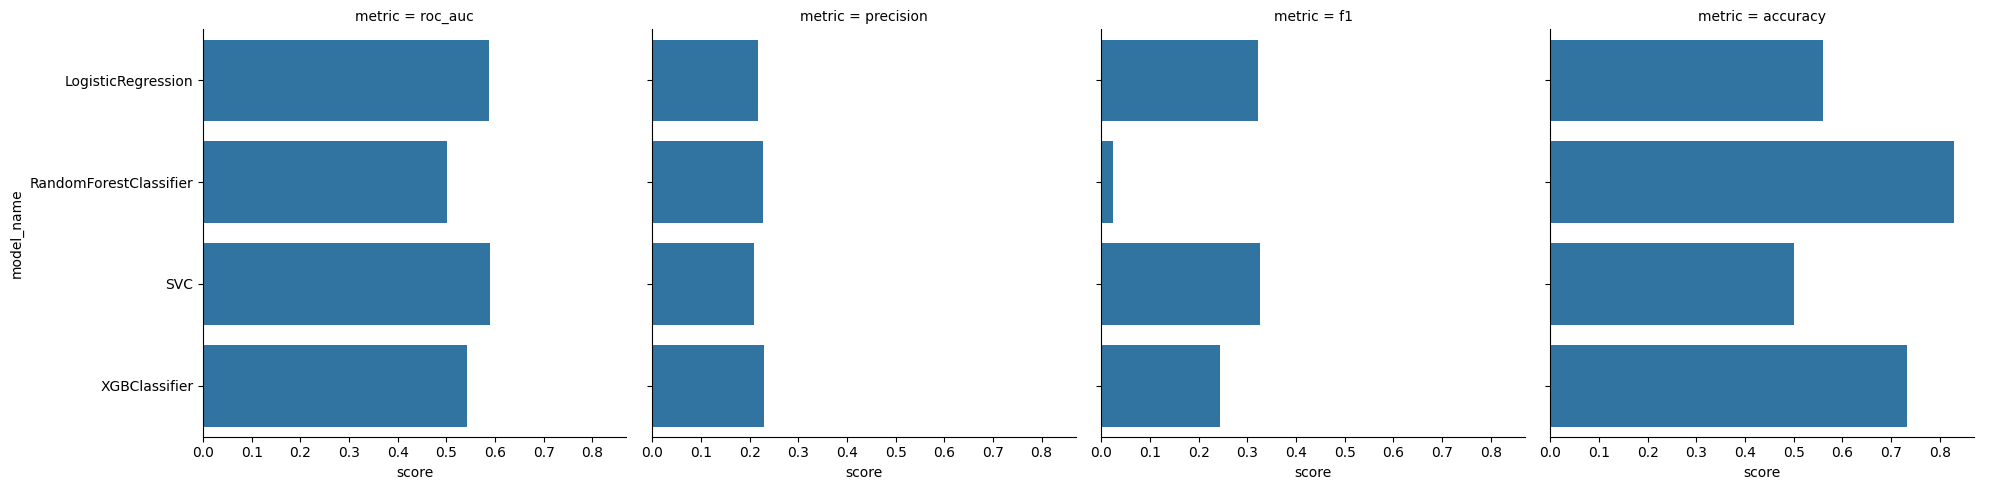

In [33]:
lr = LogisticRegression(class_weight='balanced')
rf = RandomForestClassifier(class_weight='balanced')
svc = SVC(class_weight='balanced', probability=True)
xgb = XGBClassifier(n_jobs= -1, scale_pos_weight= 5.25)
score = []
models = [lr, rf, svc, xgb]
for m in models:
    m.fit(x_train, y_train)
    y_pred = m.predict(x_test)
    name = f'{m}'.split('(')[0]
    score.append([name, 'roc_auc', roc_auc_score(y_test, y_pred)])
    score.append([name, 'precision', precision_score(y_test, y_pred)])
    score.append([name, 'f1', f1_score(y_test, y_pred)])
    score.append([name, 'accuracy', accuracy_score(y_test, y_pred)])
score_df = pd.DataFrame(score, columns= ['model_name', 'metric', 'score'])
sns.catplot(data=score_df, y='model_name', x='score', col='metric', kind='bar')
display(score_df.pivot(index='model_name', columns=['metric'], values='score').round(2))

In [34]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()

metric,accuracy,f1,precision,roc_auc
model_name,,,,
LogisticRegression,0.50,0.33,0.21,0.59
RandomForestClassifier,0.83,0.04,0.30,0.51
SVC,0.49,0.33,0.21,0.60
XGBClassifier,0.66,0.28,0.22,0.55


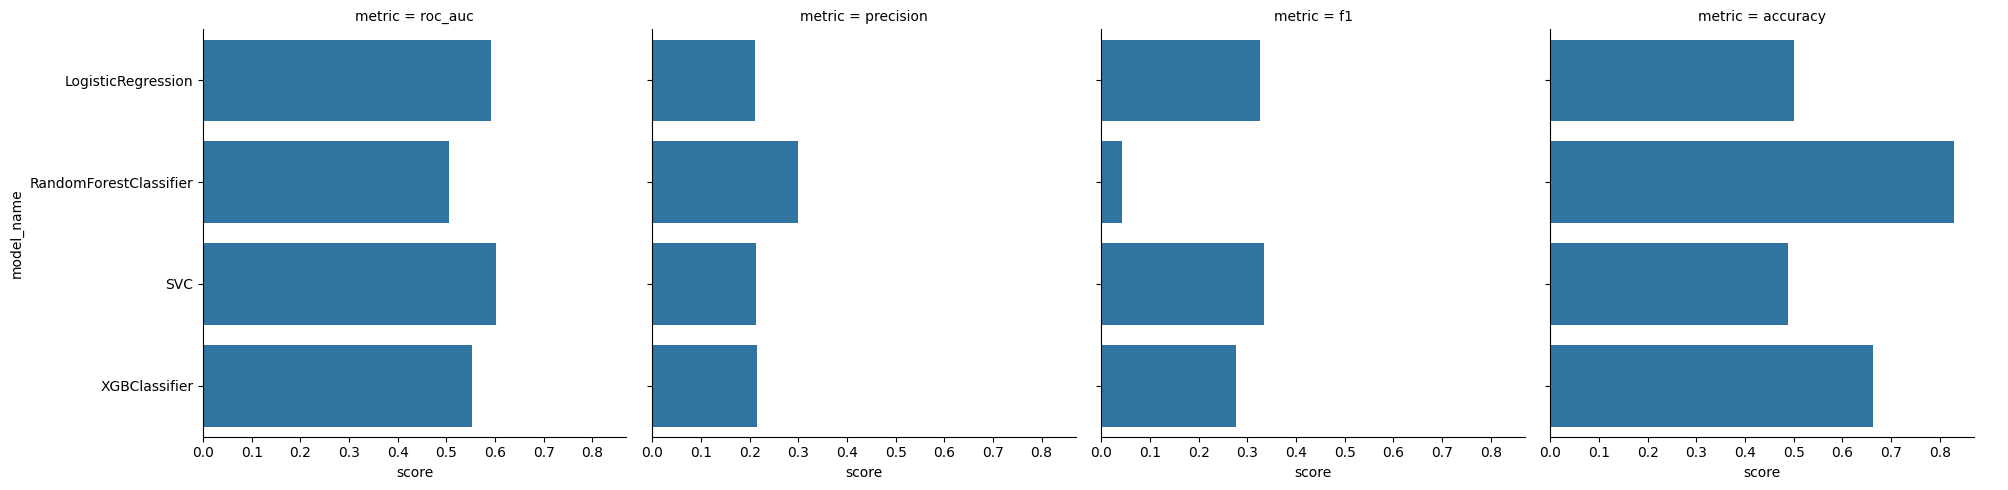

In [35]:
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.fit_transform(x_test)

lr_c = LogisticRegression(class_weight='balanced')
rf_c = RandomForestClassifier(class_weight='balanced')
svc_c = SVC(class_weight='balanced', probability=True)
xgb_c = XGBClassifier(scale_pos_weight= 5.25, n_jobs= -1)

score = []
models = [lr_c, rf_c, svc_c, xgb_c]

for m in models:
    m.fit(x_train_sc, y_train)
    y_pred = m.predict(x_test_sc)
    name = f'{m}'.split('(')[0]
    score.append([name, 'roc_auc', roc_auc_score(y_test, y_pred)])
    score.append([name, 'precision', precision_score(y_test, y_pred)])
    score.append([name, 'f1', f1_score(y_test, y_pred)])
    score.append([name, 'accuracy', accuracy_score(y_test, y_pred)])
score_df = pd.DataFrame(score, columns= ['model_name', 'metric', 'score'])
sns.catplot(data=score_df, y='model_name', x='score', col='metric', kind='bar')
display(score_df.pivot(index='model_name', columns=['metric'], values='score').round(2))

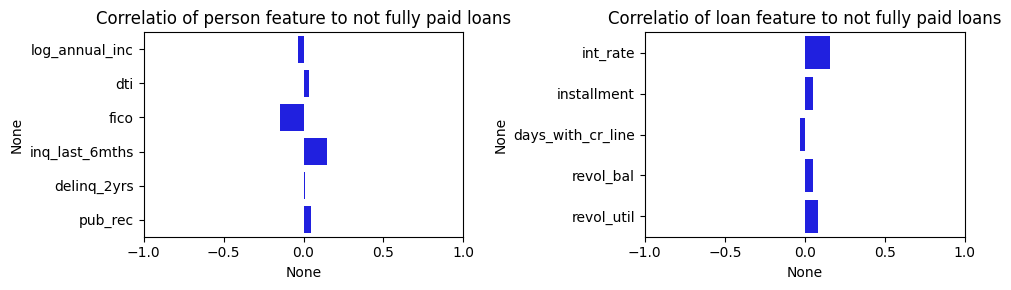

In [36]:
fig, ax = plt.subplots(1,2, figsize=(10, 3))
ax[0].set_xlim(-1, 1)
ax[0].set_title('Correlatio of person feature to not fully paid loans')

ax[1].set_xlim(-1, 1)
ax[1].set_title('Correlatio of loan feature to not fully paid loans')
cors = df_clean.corrwith(df_clean.not_fully_paid, numeric_only=True)
sns.barplot(x= cors[person], y= cors[person].index, ax=ax[0], color= 'blue')
sns.barplot(x= cors[loan], y= cors[loan].index, ax=ax[1], color= 'blue')
plt.tight_layout()

In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
numeric = ['int_rate', 'installment', 'log_annual_inc', 'dti', 'fico', 'credit_policy',
           'days_with_cr_line', 'revol_util','inq_last_6mths']
target = ['not_fully_paid']
categorical = ['purpose', 'cluster']

df_model = df_clean[numeric + categorical]
df_model = pd.get_dummies(df_model, columns=categorical, drop_first= False)
df_model = MinMaxScaler().fit_transform(df_model)
df_model = PolynomialFeatures(2, interaction_only=True).fit_transform(df_model)
x = df_model
y = df_clean[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 0)

metric,accuracy,f1,precision,roc_auc
model_name,,,,
LogisticRegression,0.62,0.33,0.23,0.60
RandomForestClassifier,0.84,0.05,0.38,0.51
SVC,0.64,0.31,0.22,0.58
XGBClassifier,0.82,0.10,0.27,0.51


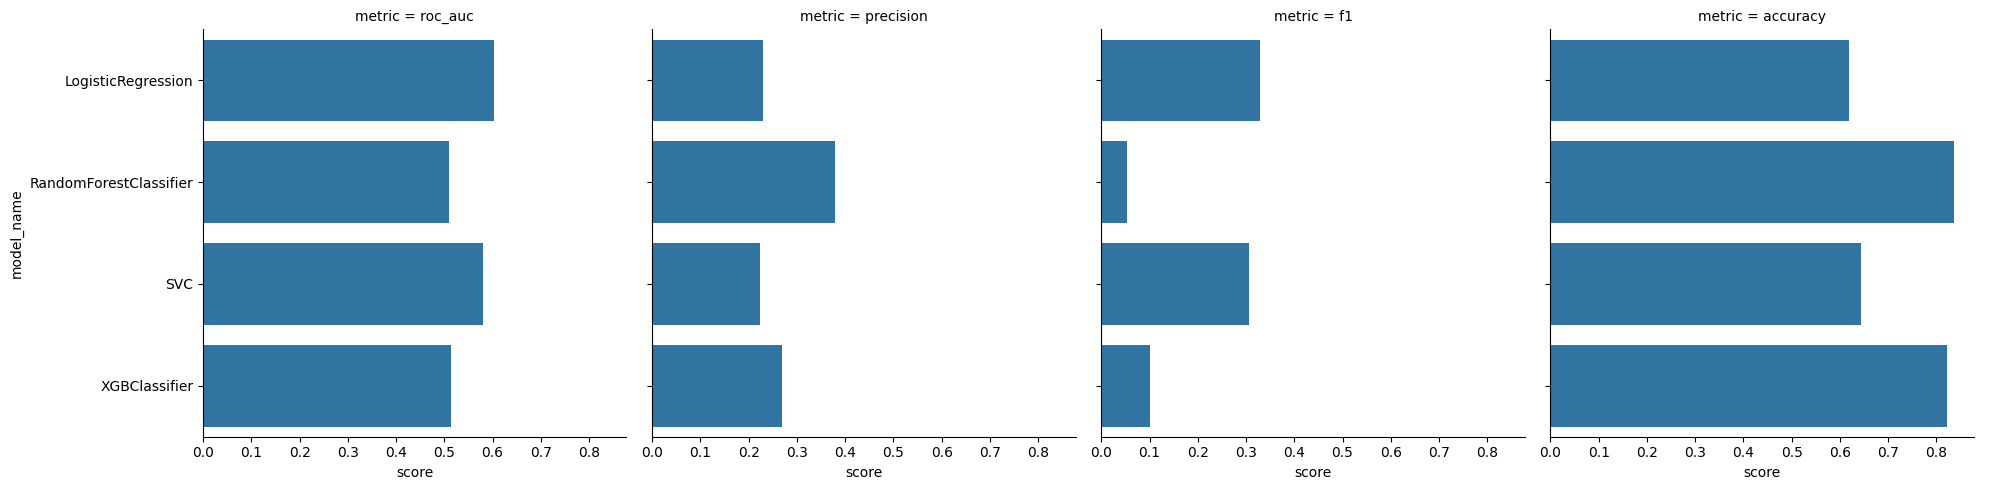

In [39]:
lr_pl = LogisticRegression(class_weight='balanced')
rf_pl = RandomForestClassifier(class_weight='balanced')
svc_pl = SVC(class_weight='balanced', probability=True)
xgb_pl = XGBClassifier(class_weight='balanced', n_jobs= -1)
score = []
models = [lr_pl, rf_pl, svc_pl, xgb_pl]
for m in models:
    m.fit(x_train, y_train)
    y_pred = m.predict(x_test)
    name = f'{m}'.split('(')[0]
    score.append([name, 'roc_auc', roc_auc_score(y_test, y_pred)])
    score.append([name, 'precision', precision_score(y_test, y_pred)])
    score.append([name, 'f1', f1_score(y_test, y_pred)])
    score.append([name, 'accuracy', accuracy_score(y_test, y_pred)])
score_df = pd.DataFrame(score, columns= ['model_name', 'metric', 'score'])
sns.catplot(data=score_df, y='model_name', x='score', col='metric', kind='bar')
display(score_df.pivot(index='model_name', columns=['metric'], values='score').round(2))

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
best_lr = {'max_iter':50, 'penalty':'l1', 'solver':'saga'}
best_rf = {'max_depth' :6, 'max_leaf_nodes': 8, 'min_samples_leaf' :3}
best_svc = {'gamma':'scale', 'kernel':'linear', 'max_iter' : -1}
best_xgb = {'colsample_bytree':0.5, 'gamma':0.6, 'learning_rate':0.01, 'max_depth': 4, 'reg_lambda':10, 'scale_pos_weight' : 4, 'subsample': 0.7}

metric,accuracy,f1,precision,roc_auc
model_name,,,,
LogisticRegression,0.62,0.33,0.23,0.61
RandomForestClassifier,0.67,0.33,0.24,0.60
SVC,0.66,0.32,0.24,0.59
XGBClassifier,0.77,0.29,0.29,0.58


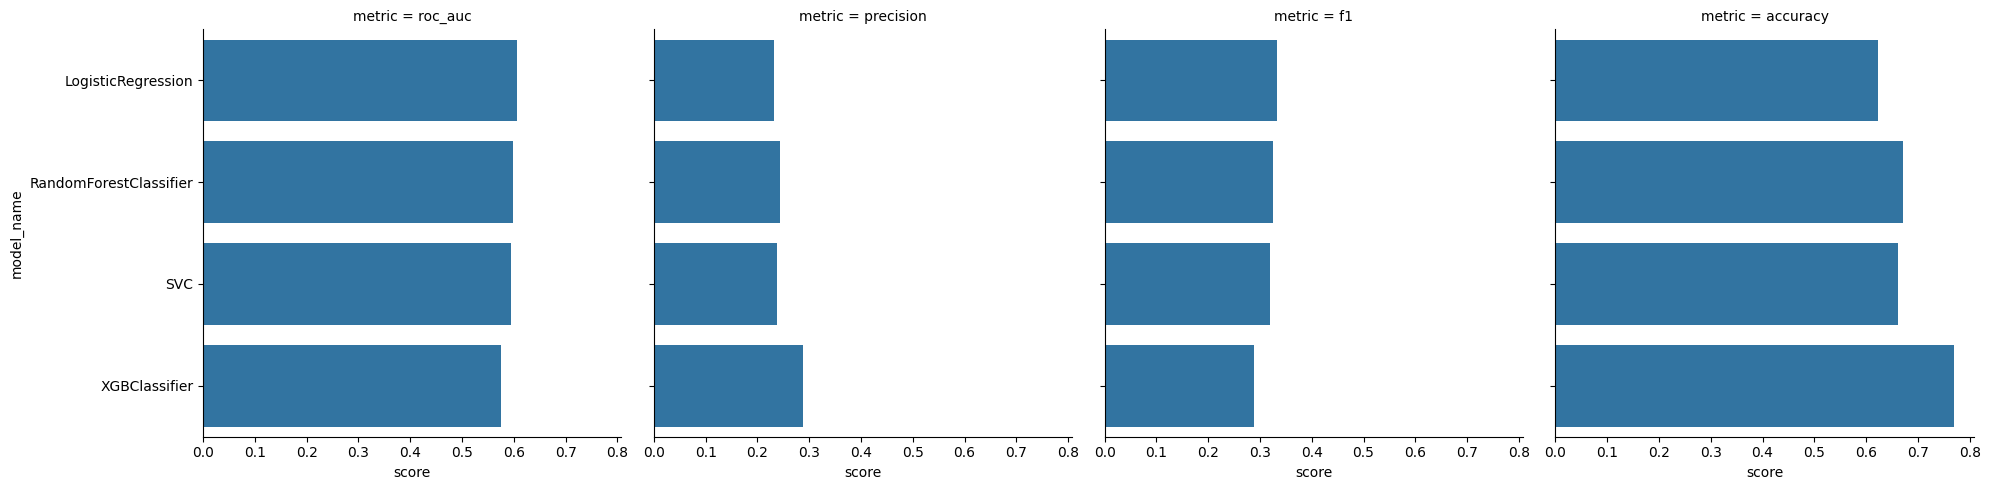

In [42]:
lr_cv = LogisticRegression(**best_lr, class_weight='balanced')
rf_cv = RandomForestClassifier(**best_rf, class_weight='balanced')
svc_cv = SVC(**best_svc, class_weight='balanced', probability=True)
xgb_cv = XGBClassifier(**best_xgb)
score = []
models = [lr_cv, rf_cv, svc_cv, xgb_cv]
for m in models:
    m.fit(x_train, y_train)
    y_pred = m.predict(x_test)
    name = f'{m}'.split('(')[0]
    score.append([name, 'roc_auc', roc_auc_score(y_test, y_pred)])
    score.append([name, 'precision', precision_score(y_test, y_pred)])
    score.append([name, 'f1', f1_score(y_test, y_pred)])
    score.append([name, 'accuracy', accuracy_score(y_test, y_pred)])
score_df = pd.DataFrame(score, columns= ['model_name', 'metric', 'score'])
sns.catplot(data=score_df, y='model_name', x='score', col='metric', kind='bar')
display(score_df.pivot(index='model_name', columns=['metric'], values='score').round(2))

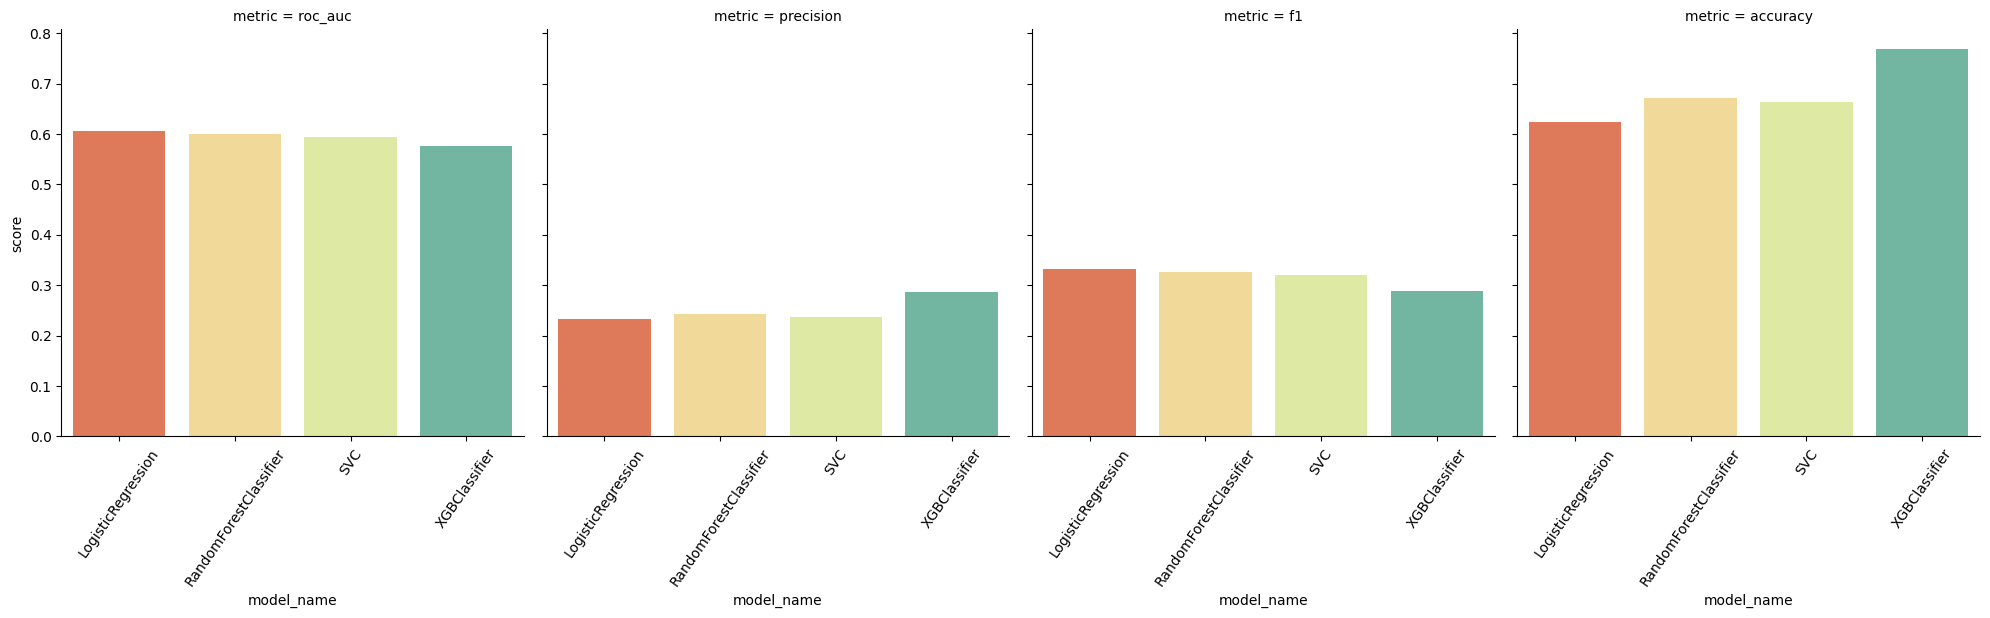

In [43]:
g = sns.catplot(data=score_df, y='score', x='model_name', col= 'metric'
               , kind='bar', palette= 'Spectral')
g.set_xticklabels(rotation= 55);

In [44]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_curve

Text(0.5, 1.0, 'ROC Curve for model')

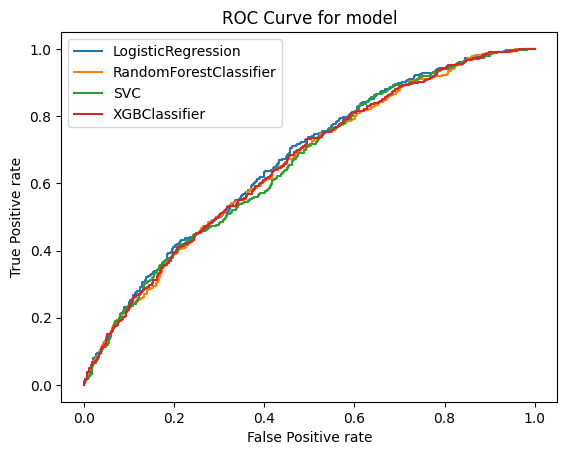

In [45]:
lr_cal = CalibratedClassifierCV(lr_cv, method= 'sigmoid', cv=3)
rf_cal = CalibratedClassifierCV(rf_cv, method= 'sigmoid', cv=3)
svc_cal = CalibratedClassifierCV(svc_cv, method= 'sigmoid', cv=3)
xgb_cal = CalibratedClassifierCV(xgb_cv, method= 'sigmoid', cv=3)

lr_cal.fit(x_train, y_train)
rf_cal.fit(x_train, y_train)
svc_cal.fit(x_train, y_train)
xgb_cal.fit(x_train, y_train)
names = ['LogisticRegression', 'RandomForestClassifier', 'SVC', 'XGBClassifier']
i = 0
for m in [lr_cal, rf_cal, svc_cal, xgb_cal]:
    fpr, tpr, thres = roc_curve(y_test, m.predict_proba(x_test)[:,1])
    plt.plot(fpr, tpr, label= f'{names[i]}')
    i += 1
plt.legend()
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC Curve for model')

<Figure size 800x400 with 0 Axes>

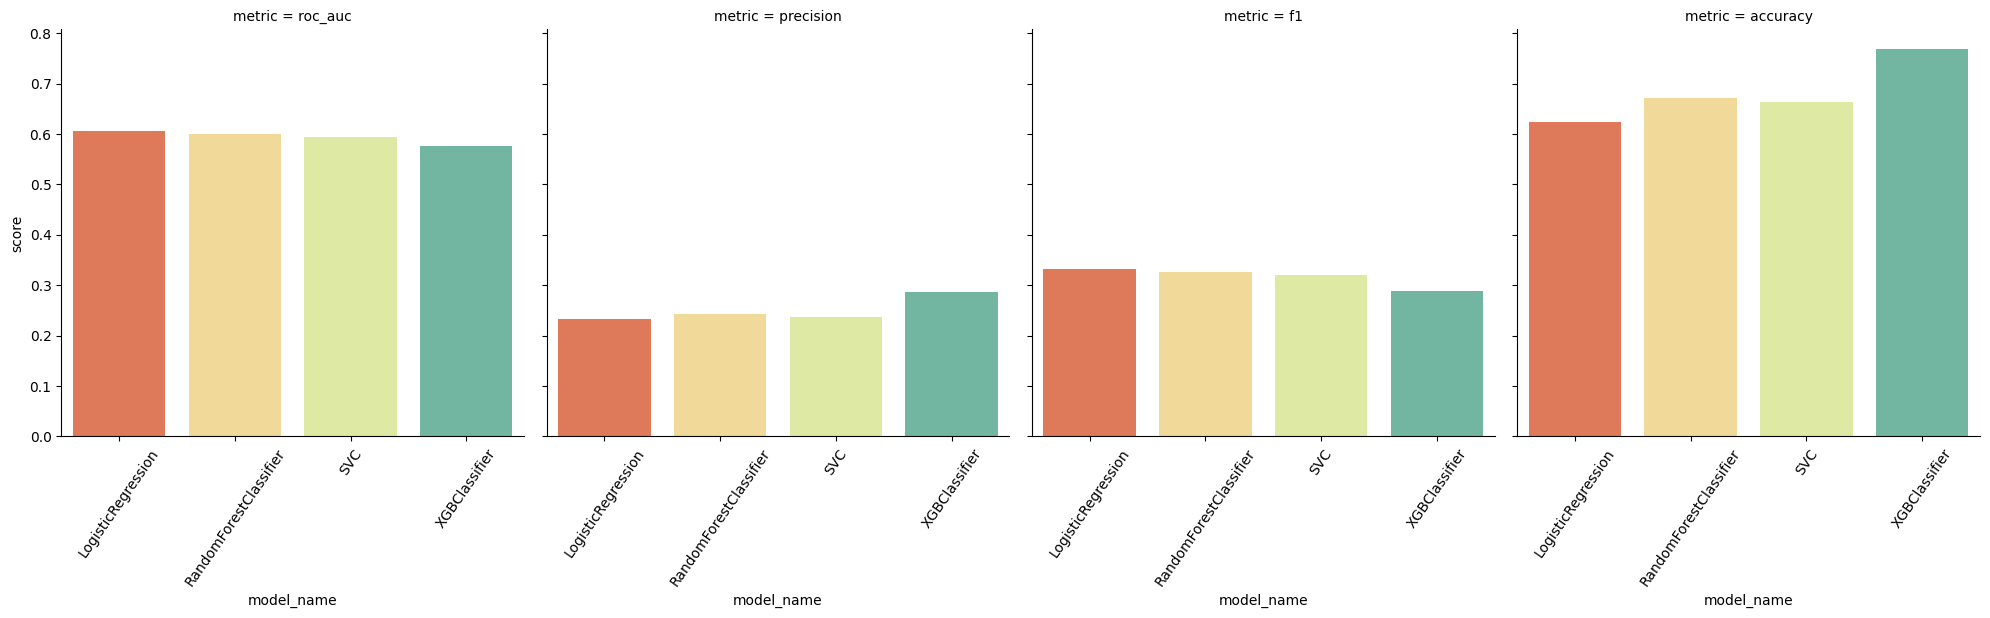

In [46]:
plt.figure(figsize=(8,4))
g = sns.catplot(data=score_df, y='score', x='model_name', col= 'metric'
               , kind='bar', palette= 'Spectral')
g.set_xticklabels(rotation= 55);

In [46]:
score_df.query('metric == "roc_auc"').round(2)

,model_name,metric,score
0,LogisticRegression,roc_auc,0.61
4,RandomForestClassifier,roc_auc,0.60
8,SVC,roc_auc,0.59
12,XGBClassifier,roc_auc,0.58


(0.0, 1.0)

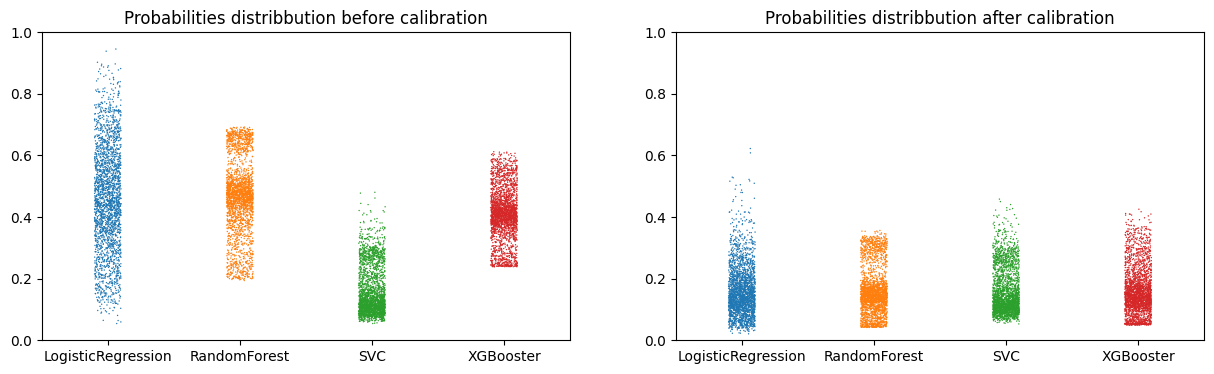

In [49]:
proba_cv = pd.DataFrame({'LogisticRegression':lr_cv.predict_proba(x_test)[:,1],
                        'RandomForest': rf_cv.predict_proba(x_test)[:,1],
                        'SVC': svc_cv.predict_proba(x_test)[:,1],
                        'XGBooster': xgb_cv.predict_proba(x_test)[:,1]
                        })
proba_cal = pd.DataFrame({'LogisticRegression':lr_cal.predict_proba(x_test)[:,1],
                        'RandomForest': rf_cal.predict_proba(x_test)[:,1],
                        'SVC': svc_cal.predict_proba(x_test)[:,1],
                        'XGBooster': xgb_cal.predict_proba(x_test)[:,1]
                        })
fig, ax = plt.subplots(1,2, figsize=(15, 4))
sns.stripplot(data= proba_cv, size=1, ax= ax[0])
ax[0].set_title('Probabilities distribbution before calibration')
ax[0].set_ylim(0,1)
sns.stripplot(data= proba_cal, size=1, ax= ax[1])
ax[1].set_title('Probabilities distribbution after calibration')
ax[1].set_ylim(0,1)